In [1]:
import os,sys,json
from core.openaire_utils import *

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

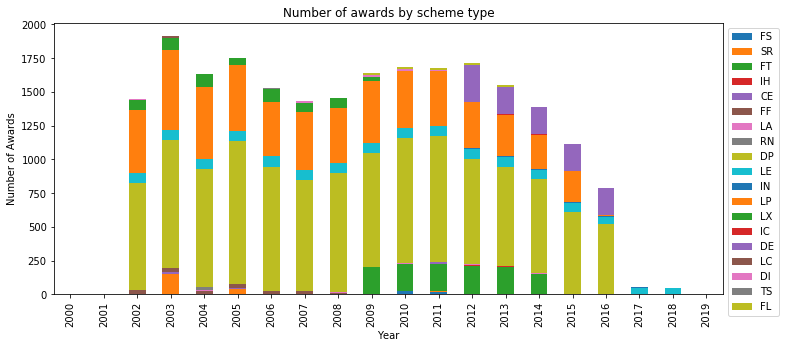

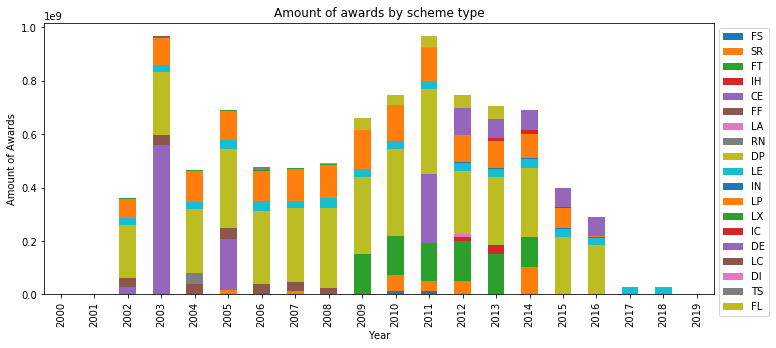

In [2]:
years = range(2000, 2020, 1)
grant_data = {str(y):{"count":{}, "amount":{}} for y in years}
data = read_arc_grant_data()
grant_scheme_types = set()
for k, v in data.items():
    try:
        if v["scheme"]:
            grant_scheme_types.update([v["scheme"]])
        if v["scheme"] in grant_data[str(int(v["year"]))]["count"]:
            grant_data[str(int(v["year"]))]["count"][v["scheme"]] += 1
            grant_data[str(int(v["year"]))]["amount"][v["scheme"]] += int(v["amount"])
        else:
            grant_data[str(int(v["year"]))]["count"][v["scheme"]] = 1
            grant_data[str(int(v["year"]))]["amount"][v["scheme"]] = int(v["amount"])
    except:
        print("Error", k, v)
# print(grant_data)
index = pd.Index(years, name='Year')
data_c = {g:[] for g in grant_scheme_types}
data_a = {g:[] for g in grant_scheme_types}
for y in years:
    for g in grant_scheme_types:
        data_c[g].append(grant_data[str(y)]["count"][g] if g in grant_data[str(y)]["count"] else 0)
        data_a[g].append(grant_data[str(y)]["amount"][g] if g in grant_data[str(y)]["amount"] else 0)
df = pd.DataFrame(data_c, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(12, 5))
ax.set_ylabel('Number of Awards')
plt.title("Number of awards by scheme type")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

df = pd.DataFrame(data_a, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(12, 5))
ax.set_ylabel('Amount of Awards')
plt.title("Amount of awards by scheme type")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

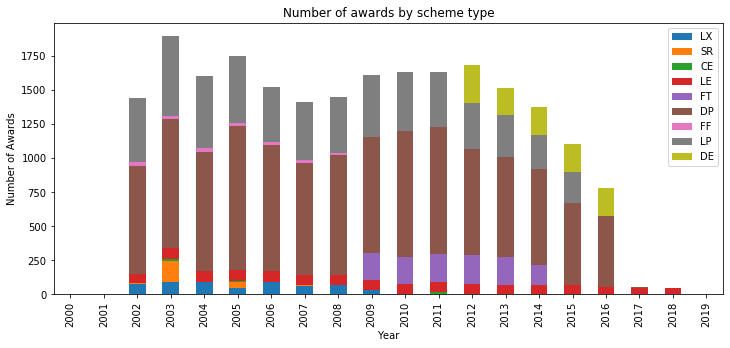

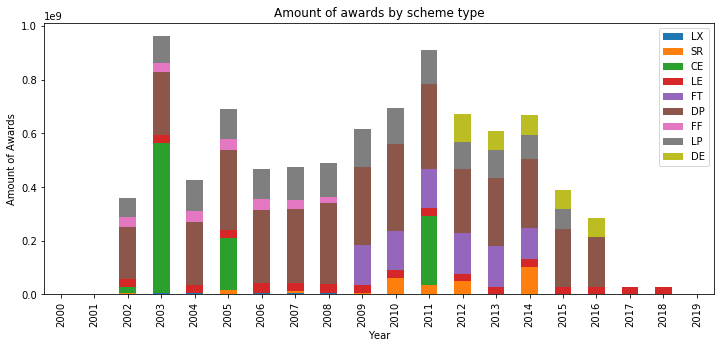

In [3]:
major = ["LX", "SR", "CE", "LE", "FT", "DP", "FF", "LP", "DE"]
m_data_c = {k:data_c[k] for k in major}
m_data_a = {k:data_a[k] for k in major}
df = pd.DataFrame(m_data_c, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(12, 5))
ax.set_ylabel('Number of Awards')
plt.title("Number of awards by scheme type")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

df = pd.DataFrame(m_data_a, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(12, 5))
ax.set_ylabel('Amount of Awards')
plt.title("Amount of awards by scheme type")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

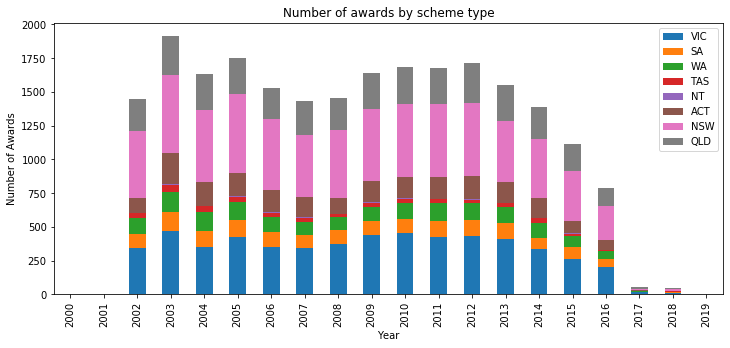

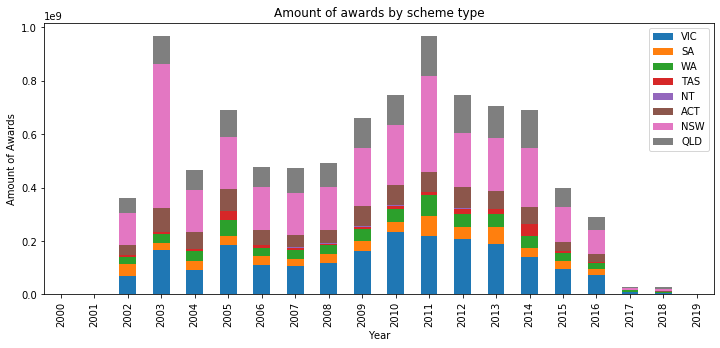

In [4]:
years = range(2000, 2020, 1)
grant_data = {str(y):{"count":{}, "amount":{}} for y in years}
grant_state_types = set()
for k, v in data.items():
    try:
        if v["state"]:
            grant_state_types.update([v["state"]])
        if v["state"] in grant_data[str(int(v["year"]))]["count"]:
            grant_data[str(int(v["year"]))]["count"][v["state"]] += 1
            grant_data[str(int(v["year"]))]["amount"][v["state"]] += int(v["amount"])
        else:
            grant_data[str(int(v["year"]))]["count"][v["state"]] = 1
            grant_data[str(int(v["year"]))]["amount"][v["state"]] = int(v["amount"])
    except:
        print("Error", k, v)
# print(grant_data)
index = pd.Index(years, name='Year')
data_c = {g:[] for g in grant_state_types}
data_a = {g:[] for g in grant_state_types}
for y in years:
    for g in grant_state_types:
        data_c[g].append(grant_data[str(y)]["count"][g] if g in grant_data[str(y)]["count"] else 0)
        data_a[g].append(grant_data[str(y)]["amount"][g] if g in grant_data[str(y)]["amount"] else 0)
df = pd.DataFrame(data_c, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(12, 5))
ax.set_ylabel('Number of Awards')
plt.title("Number of awards by scheme type")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

df = pd.DataFrame(data_a, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(12, 5))
ax.set_ylabel('Amount of Awards')
plt.title("Amount of awards by scheme type")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

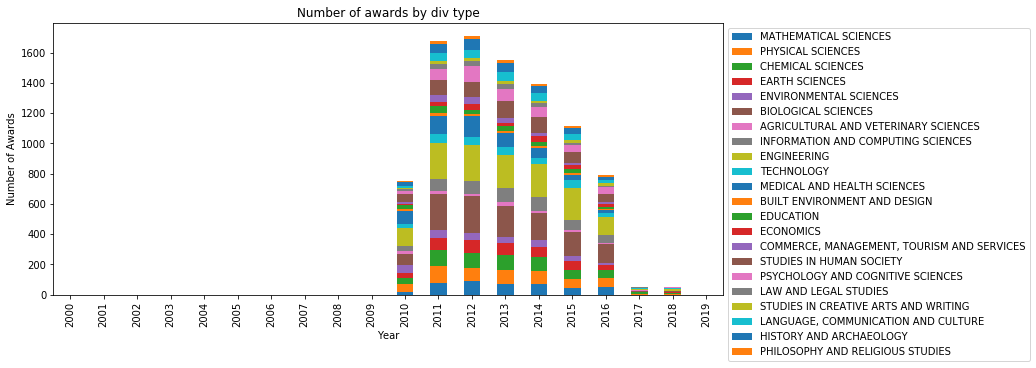

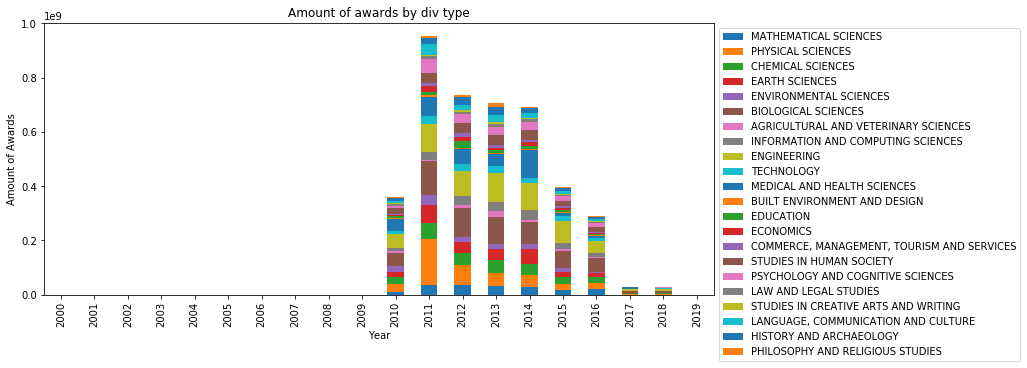

In [16]:
years = range(2000, 2020, 1)
grant_data = {str(y):{"count":{}, "amount":{}} for y in years}
grant_div_types = set()
for k, v in data.items():
    try:
        if v["div"]:
            grant_div_types.update([v["div"]])
        else:
            continue
        if v["div"] in grant_data[str(int(v["year"]))]["count"]:
            grant_data[str(int(v["year"]))]["count"][v["div"]] += 1
            grant_data[str(int(v["year"]))]["amount"][v["div"]] += int(v["amount"])
        else:
            grant_data[str(int(v["year"]))]["count"][v["div"]] = 1
            grant_data[str(int(v["year"]))]["amount"][v["div"]] = int(v["amount"])
    except:
        print("Error", k, v)
# print(grant_data)

mdiv = {
    "01": "MATHEMATICAL SCIENCES", 
    "02": "PHYSICAL SCIENCES",
    "03": "CHEMICAL SCIENCES",
    "04": "EARTH SCIENCES",
    "05": "ENVIRONMENTAL SCIENCES",
    "06": "BIOLOGICAL SCIENCES", 
    "07": "AGRICULTURAL AND VETERINARY SCIENCES",
    "08": "INFORMATION AND COMPUTING SCIENCES", 
    "09": "ENGINEERING",
    "10": "TECHNOLOGY",
    "11": "MEDICAL AND HEALTH SCIENCES",
    "12": "BUILT ENVIRONMENT AND DESIGN",
    "13": "EDUCATION",
    "14": "ECONOMICS",
    "15": "COMMERCE, MANAGEMENT, TOURISM AND SERVICES",
    "16": "STUDIES IN HUMAN SOCIETY",
    "17": "PSYCHOLOGY AND COGNITIVE SCIENCES",
    "18": "LAW AND LEGAL STUDIES",
    "19": "STUDIES IN CREATIVE ARTS AND WRITING",
    "20": "LANGUAGE, COMMUNICATION AND CULTURE",
    "21": "HISTORY AND ARCHAEOLOGY",
    "22": "PHILOSOPHY AND RELIGIOUS STUDIES"
}
index = pd.Index(years, name='Year')
data_c = {g:[] for g in mdiv.keys()}
data_a = {g:[] for g in mdiv.keys()}
for y in years:
    for g in mdiv.keys():
        data_c[g].append(grant_data[str(y)]["count"][g] if g in grant_data[str(y)]["count"] else 0)
        data_a[g].append(grant_data[str(y)]["amount"][g] if g in grant_data[str(y)]["amount"] else 0)
df = pd.DataFrame(data_c, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(12, 5))
ax.set_ylabel('Number of Awards')
plt.title("Number of awards by div type")
plt.legend(mdiv.values(), bbox_to_anchor=(1, 1))
plt.show()

df = pd.DataFrame(data_a, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(12, 5))
ax.set_ylabel('Amount of Awards')
plt.title("Amount of awards by div type")
plt.legend(mdiv.values(), bbox_to_anchor=(1, 1))
plt.show()